<a href="https://colab.research.google.com/github/juanjomar22-glitch/Juan.Marquez/blob/main/Caracterizacion_VA_Clase_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Caso de estudio**

En este espacio de trabajo de plantea como caso de estudio el analisis de los riesgos asociados a las operaciones del negocio de la Naviera EVERGREEN.
Esta naviera Taiwanesa opera en 240 puertos alrededor del mundo utilizando 150 buques canal de panama.
Los riesgos operacionales a los cuales esta expuesta la naviera estan relacionados con la logistica portuaria frente a la carga y descarga de contenedores. De esta manera este riesgo operacional se describe a traves de dos variables estadisticas aleatorias:
- Frecuencia: Indica el numero de contenedores que se quedan en tierra por semana (tiempo).
- Severidad (KUSD): Indica el costo de solucionar cada evento de riesgo.
Es importante mencionar que el producto entre la severidad y la frecuencia da como resultado la distribucion agregada de las perdidas. (LDA - Loss distribution approach) y es precisamente que se hara la caracterizacion de esta distribucion usando las medidas de tendencia central (Media, desviacion) y las medidas de dispercion (coeficiente de asimetria, Kurtosis)

In [1]:
#Cargar las librerias de trabajo

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns #Libreria para el trabajo estadistico
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Se cargan los archivos de trabajo

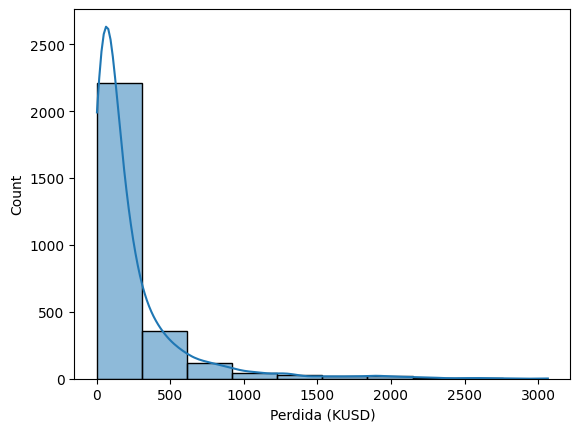

In [26]:
nxl= "/content/drive/MyDrive/Integracion de datos y prospectiva/1. RiesgoOperacional_EVERGREEEN.xlsx"
XDB=pd.read_excel(nxl, sheet_name=0) #Llamo la hoja del archivo deseada con shhet_name=
XDB.head(10)

#procedemos con la distribucion agregada de las perdidas
freq=XDB.iloc[:,3]
Sev=XDB.iloc[:,4]
LDA=freq*Sev
#Se procede con la construccion de la distribucion agregada (LDA)
plt.figure()
sns.histplot(LDA,bins=10,kde=True)
plt.xlabel("Perdida (KUSD)")
plt.show()

## Explicación Detallada del Código

Este notebook se enfoca en el análisis de riesgos operacionales para la naviera EVERGREEN, utilizando las distribuciones de Frecuencia y Severidad para construir la Distribución Agregada de Pérdidas (LDA).

### 1. Carga de Librerías de Trabajo (Celda `pcdKRW7gANA-`)

En esta sección, se importan las librerías esenciales para el análisis de datos, la visualización y la interacción con Google Drive:

*   `import numpy as np`:
    *   **Función**: NumPy (Numerical Python) es una librería fundamental para la computación numérica en Python. Proporciona un objeto de arreglo multidimensional de alto rendimiento (ndarray) y herramientas para trabajar con estos arreglos.
    *   **Uso aquí**: Aunque no se usa directamente en el código visible, es una librería estándar para cualquier análisis numérico y a menudo es un requisito subyacente para otras librerías como Pandas.

*   `import pandas as pd`:
    *   **Función**: Pandas es una librería potente para la manipulación y análisis de datos. Ofrece estructuras de datos como DataFrames y Series, que son muy eficientes para trabajar con datos tabulares.
    *   **Uso aquí**: Se utiliza para leer el archivo Excel (`pd.read_excel`) y para manejar los datos en formato de DataFrame (`XDB`) y Series (`freq`, `Sev`, `LDA`).

*   `import seaborn as sns`:
    *   **Función**: Seaborn es una librería de visualización de datos basada en Matplotlib que proporciona una interfaz de alto nivel para dibujar gráficos estadísticos atractivos e informativos.
    *   **Uso aquí**: Se emplea la función `sns.histplot` para crear un histograma con la densidad de kernel estimada, visualizando la distribución de la LDA.

*   `import matplotlib.pyplot as plt`:
    *   **Función**: Matplotlib es una librería de trazado para Python que genera figuras, histogramas, diagramas de potencia, gráficos de barras, etc. `pyplot` es una colección de funciones que hacen que Matplotlib funcione como MATLAB.
    *   **Uso aquí**: Se usa para controlar la figura del gráfico (`plt.figure()`) y para mostrar el gráfico generado (`plt.show()`). Seaborn se basa en Matplotlib, por lo que a menudo se usan juntos.

*   `from google.colab import drive` y `drive.mount('/content/drive')`:
    *   **Función**: Estas líneas son específicas de Google Colab y permiten montar Google Drive en el entorno de Colab. Esto hace que los archivos almacenados en tu Drive sean accesibles para tu notebook.
    *   **Uso aquí**: Necesario para poder leer el archivo `RiesgoOperacional_EVERGREEEN.xlsx` que se encuentra en tu Google Drive.

### 2. Carga y Procesamiento de Datos (Celda `gDp5whbpB6Tb`)

Esta sección se encarga de cargar el conjunto de datos, extraer las variables relevantes y calcular la Distribución Agregada de Pérdidas.

*   `nxl= "/content/drive/MyDrive/Integracion de datos y prospectiva/1. RiesgoOperacional_EVERGREEEN.xlsx"`:
    *   **Función**: Asigna la ruta del archivo Excel que contiene los datos a la variable `nxl`. Esta ruta apunta directamente a un archivo en tu Google Drive (una vez montado).
    *   **Uso aquí**: Define la ubicación de los datos de origen.

*   `XDB=pd.read_excel(nxl, sheet_name=0)`:
    *   **Función**: Utiliza la función `read_excel` de Pandas para leer un archivo Excel. El primer argumento es la ruta del archivo (`nxl`) y `sheet_name=0` especifica que se debe leer la primera hoja del libro de Excel (índice 0).
    *   **Uso aquí**: Carga los datos crudos del riesgo operacional en un DataFrame de Pandas llamado `XDB`.

*   `XDB.head(10)`:
    *   **Función**: El método `head()` de un DataFrame se utiliza para mostrar las primeras 'n' filas del DataFrame. Si no se especifica 'n', por defecto muestra las primeras 5 filas.
    *   **Uso aquí**: Permite una rápida inspección de los primeros 10 registros del DataFrame `XDB` para verificar que los datos se cargaron correctamente y entender su estructura inicial.

*   `freq=XDB.iloc[:,3]`:
    *   **Función**: `.iloc` es un indexador basado en la posición de enteros para la selección por fila/columna en DataFrames de Pandas. `[:,3]` significa seleccionar todas las filas (`:`) y la columna en el índice 3 (que es la cuarta columna, ya que los índices comienzan en 0).
    *   **Uso aquí**: Extrae los datos de la columna 'Frecuencia' del DataFrame `XDB` y los guarda en una Serie de Pandas llamada `freq`.

*   `Sev=XDB.iloc[:,4]`:
    *   **Función**: Similar al anterior, selecciona todas las filas y la columna en el índice 4 (la quinta columna).
    *   **Uso aquí**: Extrae los datos de la columna 'Severidad' del DataFrame `XDB` y los guarda en una Serie de Pandas llamada `Sev`.

*   `LDA=freq*Sev`:
    *   **Función**: Realiza una multiplicación elemento a elemento entre las Series `freq` y `Sev`. En el contexto de riesgo operacional, el producto de frecuencia por severidad representa la pérdida agregada.
    *   **Uso aquí**: Calcula la Distribución Agregada de Pérdidas (LDA) para cada registro y la almacena en una nueva Serie llamada `LDA`.

*   `plt.figure()`:
    *   **Función**: Crea una nueva figura de Matplotlib, que actúa como un contenedor para todos los elementos del gráfico (ejes, gráficos, texto, etc.).
    *   **Uso aquí**: Prepara el lienzo para el gráfico que se va a crear.

*   `sns.histplot(LDA,bins=10,kde=True)`:
    *   **Función**: La función `histplot` de Seaborn genera un histograma. Un histograma muestra la distribución de una variable numérica dividiendo los datos en 'bins' (contenedores) y contando cuántos puntos de datos caen en cada bin.
        *   `LDA`: Es la serie de datos sobre la cual se construirá el histograma.
        *   `bins=10`: Define el número de barras o contenedores en el histograma. En este caso, se dividirá el rango de valores de `LDA` en 10 intervalos iguales.
        *   `kde=True`: Añade una Estimación de Densidad de Kernel (KDE) al histograma. La KDE es una forma de estimar la función de densidad de probabilidad de una variable aleatoria de forma no paramétrica, lo que produce una curva suavizada que representa la distribución de los datos.
    *   **Uso aquí**: Visualiza la distribución de la Distribución Agregada de Pérdidas (`LDA`), mostrando tanto la frecuencia de los valores (histograma) como una estimación de su densidad (KDE).

*   `plt.show()`:
    *   **Función**: Muestra la figura de Matplotlib que se ha creado y configurado. Sin esta función, a menudo los gráficos no se renderizan en muchos entornos de Python, incluido Colab, si no es la última línea de una celda.
    *   **Uso aquí**: Hace que el histograma con la curva KDE de la LDA sea visible en el output de la celda.